In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
try:
    data = pd.read_csv('/kaggle/input/amazon-sales-dataset/amazon.csv')
except:
    data = pd.read_csv('amazon.csv')
data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [3]:
data = data.drop(columns='product_name')
data = data.drop(columns='category')
data = data.drop(columns='discounted_price')
data = data.drop(columns='actual_price')
data = data.drop(columns='discount_percentage')
data = data.drop(columns='about_product')
data = data.drop(columns='user_name')
data = data.drop(columns='review_id')
data = data.drop(columns='review_title')
data = data.drop(columns='review_content')
data = data.drop(columns='img_link')
data = data.drop(columns='product_link')
data = data.drop(columns='rating_count')

In [4]:
data

,product_id,rating,user_id
0,B07JW9H4J1,4.2,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,4.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,3.9,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,4.2,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,B08CF3B7N1,4.2,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."
...,...,...,...
1460,B08L7J3T31,4,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U..."
1461,B01M6453MB,4.1,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH..."
1462,B009P2LIL4,3.6,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ..."
1463,B00J5DYCCA,4,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS..."


In [5]:
data.isnull().sum()

product_id    0
rating        0
user_id       0
dtype: int64

# Check the distribution of the rating

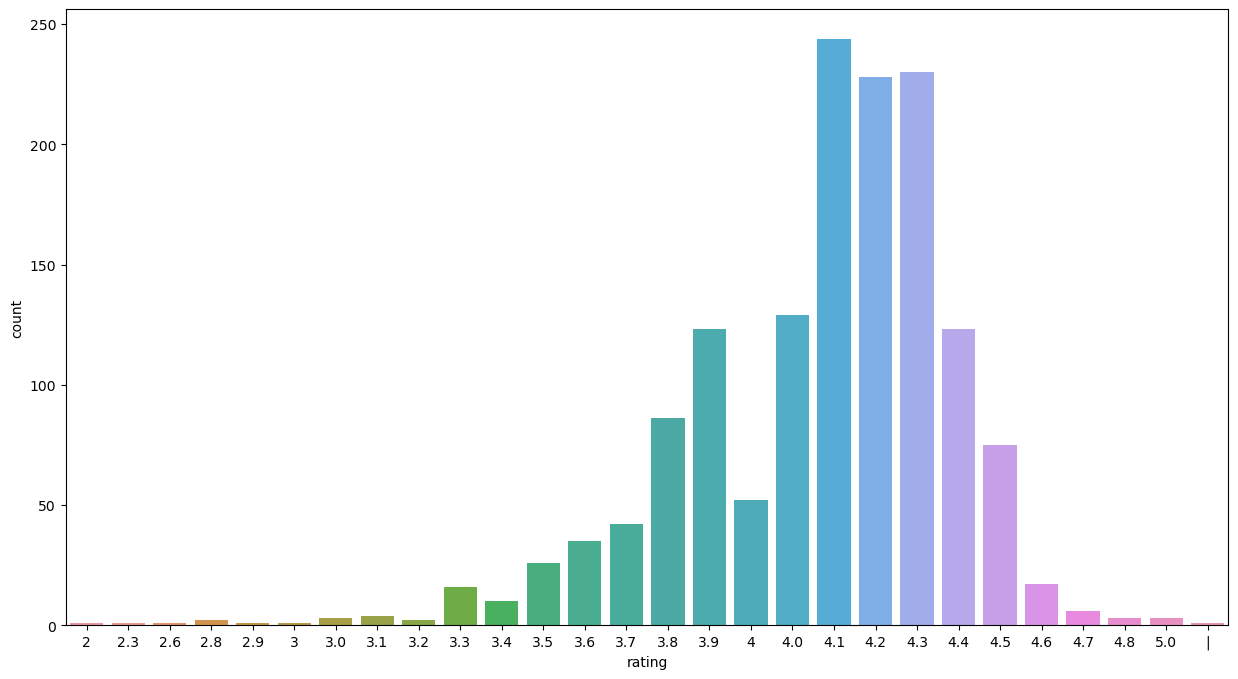

In [6]:
plt.figure(figsize=(15, 8))
sns.countplot(data, x=data.rating.sort_values())
plt.show()

In [7]:
data = data.dropna()
data = data[data.rating != '|']

In [8]:
data.product_id = LabelEncoder().fit_transform(data.product_id)
data.user_id = LabelEncoder().fit_transform(data.user_id)

In [9]:
data

,product_id,rating,user_id
0,346,4.2,623
1,847,4.0,88
2,818,3.9,848
3,643,4.2,254
4,588,4.2,17
...,...,...,...
1460,672,4,1049
1461,201,4.1,425
1462,27,3.6,864
1463,61,4,300


# Splitting the dataset


In [10]:
trainSet, testSet = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
trainSet

,product_id,rating,user_id
1331,557,3.9,1188
724,3,4.3,47
254,436,3.6,94
1068,295,3.9,1017
1193,308,3.7,401
...,...,...,...
1130,244,3.9,195
1295,496,3.9,385
860,789,3.9,1187
1460,672,4,1049


In [12]:
testSet

,product_id,rating,user_id
1297,236,4.2,1170
175,947,3.7,615
275,955,3.3,220
548,680,4.3,1031
1000,1158,3.9,71
...,...,...,...
1456,1263,3.2,391
481,1188,4.1,674
482,663,3.8,620
1303,744,4,832


# Model


In [13]:
model = NearestNeighbors(metric='cosine', algorithm='brute')

In [14]:
model.fit(trainSet)

NearestNeighbors(algorithm='brute', metric='cosine')

In [15]:
distances, indices = model.kneighbors(trainSet)

In [16]:
distances

array([[0.00000000e+00, 4.30926042e-07, 8.95215081e-07, 1.32507681e-06,
        1.93784945e-06],
       [0.00000000e+00, 2.51480362e-03, 2.51480362e-03, 2.58177817e-03,
        3.03003858e-03],
       [0.00000000e+00, 7.11513843e-06, 9.00041208e-06, 1.27965496e-05,
        1.41199245e-05],
       ...,
       [1.11022302e-16, 2.34822210e-06, 2.86820781e-06, 2.86820781e-06,
        3.44382738e-06],
       [0.00000000e+00, 2.22089835e-06, 6.16072585e-06, 7.03109809e-06,
        1.03239811e-05],
       [2.22044605e-16, 1.27852826e-06, 2.65020043e-06, 3.34687652e-06,
        6.78999487e-06]])

In [17]:
indices

array([[   0,  155,  367,  780,  942],
       [   1,  443,  825, 1154,  814],
       [   2,  951, 1028,  471,   90],
       ...,
       [1168,  588,  129,  436,  933],
       [1169, 1112,  392,  398,  739],
       [1170,  664,  994, 1044,  580]])

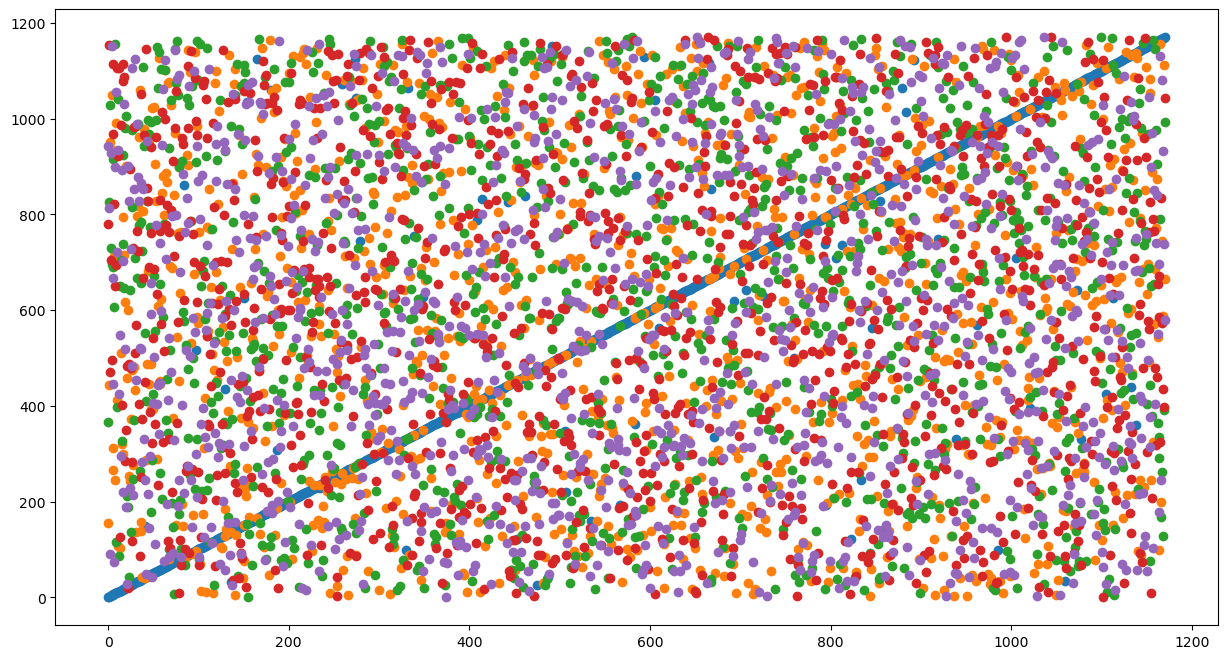

In [18]:
plt.figure(figsize=(15, 8))
plt.scatter(x=range(0, len(indices)), y=indices[:, 0])
plt.scatter(x=range(0, len(indices)), y=indices[:, 1])
plt.scatter(x=range(0, len(indices)), y=indices[:, 2])
plt.scatter(x=range(0, len(indices)), y=indices[:, 3])
plt.scatter(x=range(0, len(indices)), y=indices[:, 4])
plt.show()

# Prediction

In [19]:
def predict(model, data, n_recommendations):
    distances, indices = model.kneighbors(data)
    for i in range(len(data)):
        print("Recommendations for product: ", data.iloc[i, 0])
        for j in range(1, n_recommendations + 1):
            try:
                print(f"{j}: {data.iloc[indices[i, j], 0]}, with distance of {distances[i, j]}")
            except:
                print("No more recommendations")
                continue
        print("\n")

In [20]:
predict(model, testSet, 5)

Recommendations for product:  236
1: 1022, with distance of 3.418142113020828e-06
2: 817, with distance of 9.860070224854134e-06
3: 810, with distance of 1.1542903411099203e-05
No more recommendations
No more recommendations


Recommendations for product:  947
No more recommendations
No more recommendations
No more recommendations
No more recommendations
No more recommendations


Recommendations for product:  955
No more recommendations
2: 517, with distance of 8.964329120675352e-06
3: 395, with distance of 1.3281456370362044e-05
4: 150, with distance of 1.5060932341492972e-05
No more recommendations


Recommendations for product:  680
No more recommendations
No more recommendations
No more recommendations
4: 834, with distance of 1.3698672651774046e-06
No more recommendations


Recommendations for product:  1158
No more recommendations
No more recommendations
No more recommendations
No more recommendations
No more recommendations


Recommendations for product:  424
No more recommendat